## Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами.

Выполнил студент гр. 9382 Иерусалимов Никита, вариант 24.

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при 𝑡 → +∞.

## Основные теоретические положения

Линейная однородная система c периодическими коэффициентами - это
$$ X' = A(t)X, A(t + T) = A(t), t >= 0$$
$Ф(t)$ - фундаментальная матрица системы, то есть ее столбцы – линейно независимые решения уравнения. В матричной записи $ Ф' = A(t)Ф$. 

Если $X(t)$ - решение линейной автономной системы, то $X(t + τ)$, где $τ$ - любое число, является решением этой системы.

Матрица С, удовлетворяющая условию $$Ф(t + T) = Ф(t)C, ∀t >= 0,$$ называется основной для фундаментальной матрицы $Ф(t)$.
Спектральным радиусом матрицы А называется максимум модуля ее собственных чисел.
$$ ρ(A) = max_{0<=j<=n}|λ_j|$$

## Постановка задачи

Дано дифференциальное уравнение:
$$𝑥′′ + 𝑎(𝑝, 𝑡)𝑥 = 0, 𝑎(𝑝, 𝑡) = 𝑝 + 𝑏(𝑡), 𝑏(𝑡 + 𝑇) = 𝑏(𝑡),$$
где $𝑝$ – параметр.

Данное уравнение сводится к системе двух уравнений I-го порядка:
$$\begin{equation*}
 \begin{cases}
   𝑢′_1 = 𝑢_2,
   \\
  𝑢′_2 = −𝑎(𝑝, 𝑡)𝑢_1;
 \end{cases}
\end{equation*}$$
Здесь $$𝑢_1(𝑡) = 𝑥(𝑡), 𝑢_2(𝑡) = 𝑥′(𝑡).$$
Необходимо провести исследование устойчивости однородного линейного уравнения. Дальнейшие рассуждения применимы к любой линейной
периодической системе, а не только к системе вида (1).

## Выполнение работы

Наша функция: $$|sin(3t)|$$
Её период: $$T= \pi/3$$

Создаем массив значений параметра p от 0.5 до 9 с шагом 0.005. Далее проходимся по каждому значению и находим значение фундаментальной матрицы. Эти значения помогут найти столбцы основной матрицы из которой максимум модуля собственных чисел это спектральный радиус.


Тут же находим p0 которая разделяет зоны устойчивости и неустойчивости системы. Нахлдим ее из спектральных радиусов

In [79]:
import numpy as np
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def solution(step, start, end):

    pointArr = np.arange(start, end, step)

    T = math.pi/3
    newStep = T/222
    tArr = np.arange(0, T, newStep)

    v1 = np.array([1, 0])
    v2 = np.array([0, 1])
    spectral = []

    def b(p,t1):
        return p + math.fabs(math.sin(3*t1))

    for p in pointArr:
        func = lambda x, t1: [x[1], -b(p,t1)*x[0]]
        C = np.array([odeint(func, v1, tArr)[-1], odeint(func, v2, tArr)[-1]])
        result = np.max(np.abs(np.linalg.eigvals(C)))
        spectral.append(result)
        
    for i in range(len(spectral)):
        if spectral[-1-i] > 1:
            p0 = pointArr[-i]
            break
            
    return pointArr,spectral, p0

pointArr,spectral, p0 = solution(0.005,0.5,9)


Тут строим график зависимости по значению спектральных радиусов и рисуем зону устоичивости и не устоичивости системы 

p0 =  8.840000000000007


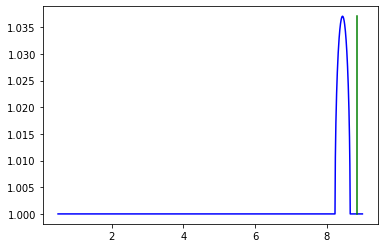

In [78]:
def plotDif(pointArr,spectral, p0):
    plt.plot(pointArr, spectral,'blue')
    plt.plot([p0, p0], [min(spectral), max(spectral)],'green')
    plt.show()

print("p0 = ", p0)
plotDif(pointArr,spectral, p0)

## Выводы

Было проведено исследование однородного линейного уравнения с периодическими коэффициентами. Была определена граница между зонами устойчивости и неустойчивости.